# Подключение библиотек и загрузка данных

In [1]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')
sns.set_context("paper", font_scale=1.5)  
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 50)

In [3]:
df=pd.read_csv('train.csv', index_col='Id')
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
14038,35,2.00,47.98,29.44,6.00,7,9.00,1969,0.09,B,B,33,7976,5,nan,0,11,B,"184,966.93"
15053,41,3.00,65.68,40.05,8.00,7,9.00,1978,0.00,B,B,46,10309,1,240.00,1,16,B,"300,009.45"
4765,53,2.00,44.95,29.20,0.00,8,12.00,1968,0.05,B,B,34,7759,0,229.00,1,3,B,"220,925.91"
5809,58,2.00,53.35,52.73,9.00,8,17.00,1977,0.44,B,B,23,5735,3,"1,084.00",0,5,B,"175,616.23"
10783,99,1.00,39.65,23.78,7.00,11,12.00,1976,0.01,B,B,35,5776,1,"2,078.00",2,4,B,"150,226.53"


In [4]:
df_test=pd.read_csv('test.csv', index_col='Id')
df_test.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,
725,58,2.00,49.88,33.43,6.00,6,14.00,1972,0.31,B,B,11,2748,1,nan,0,0,B
15856,74,2.00,69.26,nan,1.00,6,1.00,1977,0.08,B,B,6,1437,3,nan,0,2,B
5480,190,1.00,13.60,15.95,12.00,2,5.00,1909,0.00,B,B,30,7538,87,"4,702.00",5,5,B
15664,47,2.00,73.05,51.94,9.00,22,22.00,2007,0.10,B,B,23,4583,3,nan,3,3,B
14275,27,1.00,47.53,43.39,1.00,17,17.00,2017,0.07,B,B,2,629,1,nan,0,0,A


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   5202 non-null   float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
 18  Pri

In [6]:
df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,"10,000.00","10,000.00","10,000.00","7,887.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","5,202.00","10,000.00","10,000.00","10,000.00"
mean,50.40,1.89,56.32,37.20,6.27,8.53,12.61,"3,990.17",0.12,24.69,"5,352.16",8.04,"1,142.90",1.32,4.23,"214,138.86"
std,43.59,0.84,21.06,86.24,28.56,5.24,6.78,"200,500.26",0.12,17.53,"4,006.80",23.83,"1,021.52",1.49,4.81,"92,872.29"
min,0.00,0.00,1.14,0.37,0.00,1.00,0.00,"1,910.00",0.00,0.00,168.00,0.00,0.00,0.00,0.00,"59,174.78"
25%,20.00,1.00,41.77,22.77,1.00,4.00,9.00,"1,974.00",0.02,6.00,"1,564.00",0.00,350.00,0.00,1.00,"153,872.63"
50%,36.00,2.00,52.51,32.78,6.00,7.00,13.00,"1,977.00",0.08,25.00,"5,285.00",2.00,900.00,1.00,3.00,"192,269.64"
75%,75.00,2.00,65.90,45.13,9.00,12.00,17.00,"2,001.00",0.20,36.00,"7,227.00",5.00,"1,548.00",2.00,6.00,"249,135.46"
max,209.00,19.00,641.07,"7,480.59","2,014.00",42.00,117.00,"20,052,011.00",0.52,74.00,"19,083.00",141.00,"4,849.00",6.00,23.00,"633,233.47"


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 725 to 12504
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     5000 non-null   int64  
 1   Rooms          5000 non-null   float64
 2   Square         5000 non-null   float64
 3   LifeSquare     3959 non-null   float64
 4   KitchenSquare  5000 non-null   float64
 5   Floor          5000 non-null   int64  
 6   HouseFloor     5000 non-null   float64
 7   HouseYear      5000 non-null   int64  
 8   Ecology_1      5000 non-null   float64
 9   Ecology_2      5000 non-null   object 
 10  Ecology_3      5000 non-null   object 
 11  Social_1       5000 non-null   int64  
 12  Social_2       5000 non-null   int64  
 13  Social_3       5000 non-null   int64  
 14  Healthcare_1   2623 non-null   float64
 15  Helthcare_2    5000 non-null   int64  
 16  Shops_1        5000 non-null   int64  
 17  Shops_2        5000 non-null   object 
dtypes: fl

###### Вывод: Оба фрейма имеют одинаковую структуру

# Посмотрим структуру объектных переменных

In [8]:
df.describe(include='object')

,Ecology_2,Ecology_3,Shops_2
count,10000,10000,10000
unique,2,2,2
top,B,B,B
freq,9903,9725,9175


In [9]:
df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

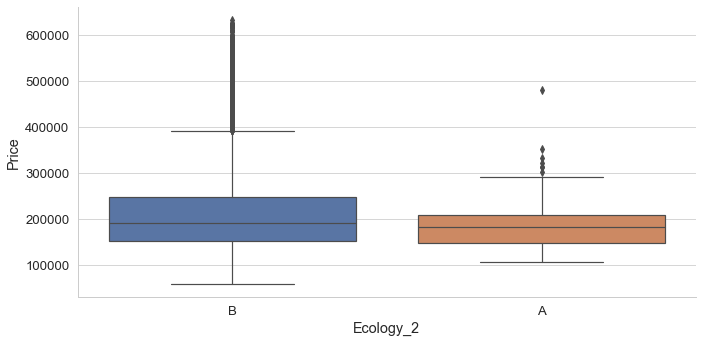

In [10]:
sns.catplot('Ecology_2', 'Price', kind="box", data=df, aspect=2/1);

In [11]:
df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

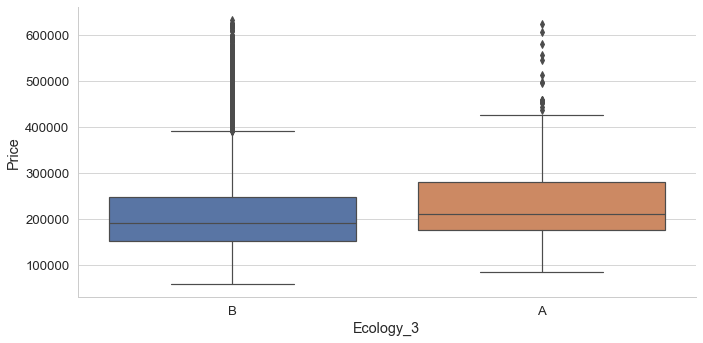

In [12]:
sns.catplot('Ecology_3', 'Price', kind="box", data=df, aspect=2/1);

In [13]:
df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

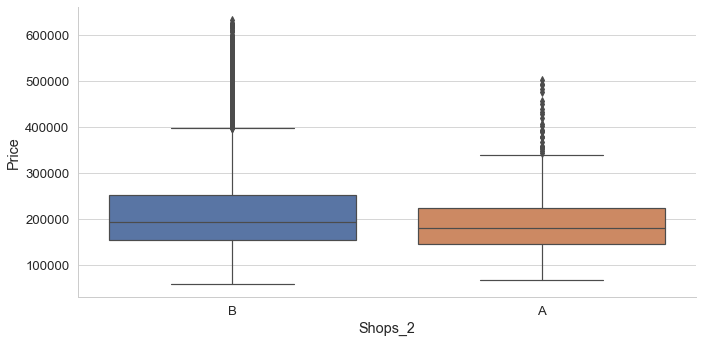

In [14]:
sns.catplot('Shops_2', 'Price', kind="box", data=df, aspect=2/1);

###### Промежуточный вывод: Объектные переменные выглядят как маловлияющие на цену. Кандидаты на исключение вдальнейщем

# Сколько пропущенных значений

In [15]:
len(df) - df.count()

DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

###### Вывод: Две переменные имеют пропущенные значения

In [16]:
df['LifeSquare'].describe()

count   7,887.00
mean       37.20
std        86.24
min         0.37
25%        22.77
50%        32.78
75%        45.13
max     7,480.59
Name: LifeSquare, dtype: float64

###### Вывод: много пропущеных, и очень большой разброс значений (4 порядка), но пока не понятно, что с этим делать

### Посмотрим, какие данные по комнатам

In [17]:
df['Rooms'].value_counts()

2.00     3880
1.00     3705
3.00     2235
4.00      150
5.00       18
0.00        8
10.00       2
19.00       1
6.00        1
Name: Rooms, dtype: int64

###### Комнат не может быть 0, постараемся исправить ситуацию

## Добавим новую переменную: Площадь одной комнаты

In [18]:
df['OneRoomSquare'] = df['Square'] // df['Rooms']
df_test['OneRoomSquare'] = df_test['Square'] // df_test['Rooms']

df.loc[(df['OneRoomSquare'] < 1) | df['OneRoomSquare'].isna(), 'OneRoomSquare'] =  df['Square']

df_test.loc[(df_test['OneRoomSquare'] < 1) | df_test['OneRoomSquare'].isna(), 'OneRoomSquare'] =  df_test['Square']

df['OneRoomSquare'].describe()

count   10,000.00
mean          inf
std           nan
min          1.00
25%         25.00
50%         30.00
75%         39.00
max           inf
Name: OneRoomSquare, dtype: float64

In [19]:
df.loc[df['Rooms'] == 0, 'Rooms'] =  df['Square'] // df['OneRoomSquare'].median()
df_test.loc[df_test['Rooms'] == 0, 'Rooms'] =  df_test['Square'] // df['OneRoomSquare'].median()

In [20]:
df.loc[(df['OneRoomSquare'] > 90) & (df['Rooms'] <3), 'Rooms'] =  df['Square'] // df['OneRoomSquare'].median()
df_test.loc[(df_test['OneRoomSquare'] > 90) & (df_test['Rooms'] <3), 'Rooms'] =  df_test['Square'] // df['OneRoomSquare'].median()

df.loc[df['OneRoomSquare'] > 90, 'OneRoomSquare'] = df['OneRoomSquare'].median()
df_test.loc[df_test['OneRoomSquare'] > 90, 'OneRoomSquare'] = df['OneRoomSquare'].median()

In [21]:
df['OneRoomSquare'].describe()

count   10,000.00
mean        31.68
std          8.90
min          1.00
25%         25.00
50%         30.00
75%         38.00
max         87.00
Name: OneRoomSquare, dtype: float64

In [22]:
df_test['OneRoomSquare'].describe()

count   5,000.00
mean       31.45
std         8.95
min         1.00
25%        25.00
50%        30.00
75%        38.00
max        88.00
Name: OneRoomSquare, dtype: float64

###### новую переменную привели к понятным значениям
вернёмся к количеству комнат

In [23]:
df.loc[(df['Rooms'] > 5) & (df['OneRoomSquare'] < 90), 'Rooms'] =  df['Square'] //df['OneRoomSquare'].median()
df_test.loc[(df_test['Rooms'] > 5) & (df_test['OneRoomSquare'] < 90), 'Rooms'] =  df_test['Square'] //df['OneRoomSquare'].median()

df.loc[df['Rooms'].isna(), 'Rooms'] = df['Square'] // df['OneRoomSquare']
df_test.loc[df_test['Rooms'].isna(), 'Rooms'] = df_test['Square'] // df_test['OneRoomSquare']

df.loc[(df['Rooms'] > 5), 'Rooms'] =  5
df_test.loc[(df_test['Rooms'] > 5), 'Rooms'] =  5

df.loc[df['Rooms'] == 0, 'Rooms'] =  1
df_test.loc[df_test['Rooms'] == 0, 'Rooms'] =  1

In [24]:
df['Rooms'].value_counts()

2.00    3881
1.00    3686
3.00    2250
4.00     157
5.00      26
Name: Rooms, dtype: int64

In [25]:
df_test['Rooms'].value_counts()

2.00    2031
1.00    1759
3.00    1108
4.00      93
5.00       9
Name: Rooms, dtype: int64

###### Количество комнат привели к нормальным значениям

### Посмотрим влияние основных параметров на цену

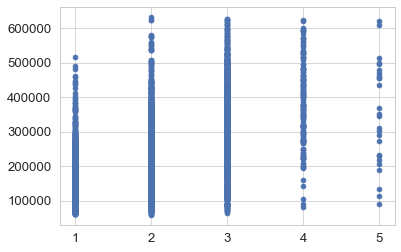

In [26]:
plt.scatter(df['Rooms'], df['Price'])

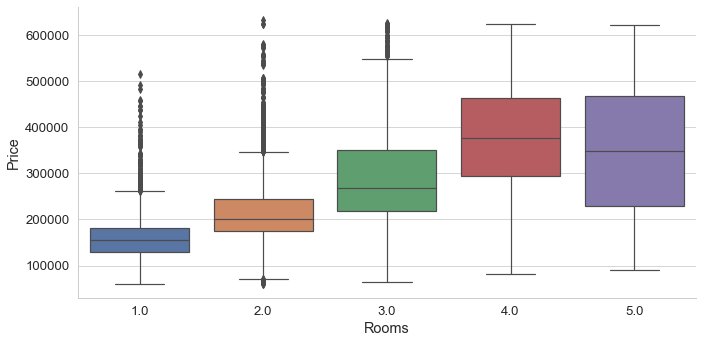

In [27]:
sns.catplot('Rooms', 'Price', kind="box", data=df, aspect=2/1);

In [28]:
df['LifeSquare'].describe()

count   7,887.00
mean       37.20
std        86.24
min         0.37
25%        22.77
50%        32.78
75%        45.13
max     7,480.59
Name: LifeSquare, dtype: float64

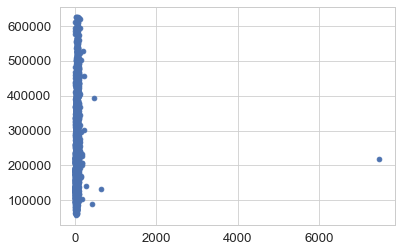

In [29]:
plt.scatter(df['LifeSquare'], df['Price'])

## Все типы переменных площади должны вести себя примерно одинаково.
## Значит, одинаковым образом будем обрабатывать выбросы данных переменных

In [30]:
df.loc[df['LifeSquare'].isna(), 'LifeSquare'] = df['Square'] - df['KitchenSquare']
df_test.loc[df_test['LifeSquare'].isna(), 'LifeSquare'] = df_test['Square'] - df_test['KitchenSquare']

In [31]:
df['temp'] = df['Square']
df.loc[df['LifeSquare'] / df['Square'] > 1.0, 'Square'] = df.loc[df['LifeSquare'] / df['Square'] > 1.0, 'LifeSquare']
df.loc[df['LifeSquare'] / df['temp'] > 1.0 , 'LifeSquare'] = df.loc[df['LifeSquare'] / df['temp'] > 1.0 , 'temp']
df.drop('temp', axis=1, inplace=True)

df_test['temp'] = df_test['Square']
df_test.loc[df_test['LifeSquare'] / df_test['Square'] > 1.0, 'Square'] = df_test.loc[df_test['LifeSquare'] / df_test['Square'] > 1.0, 'LifeSquare']
df_test.loc[df_test['LifeSquare'] / df_test['temp'] > 1.0 , 'LifeSquare'] = df_test.loc[df_test['LifeSquare'] / df_test['temp'] > 1.0 , 'temp']
df_test.drop('temp', axis=1, inplace=True)

In [32]:
df.loc[df['Square'] > 250 , 'Square'] = df['Square'].median()
df.loc[df['KitchenSquare'] > 80 , 'KitchenSquare'] = df['KitchenSquare'].median()
df.loc[df['LifeSquare'] > 250 , 'LifeSquare'] = df['LifeSquare'].median()

df_test.loc[df_test['Square'] > 250 , 'Square'] = df['Square'].median()
df_test.loc[df_test['KitchenSquare'] > 80 , 'KitchenSquare'] = df['KitchenSquare'].median()
df_test.loc[df_test['LifeSquare'] > 250 , 'LifeSquare'] = df['LifeSquare'].median()

## Посмотрим влияние разных типов площадей на цену

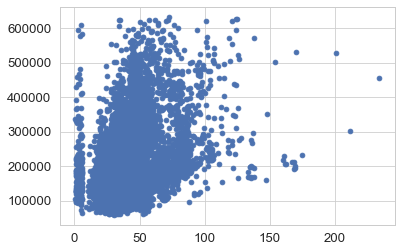

In [33]:
plt.scatter(df['LifeSquare'], df['Price'])

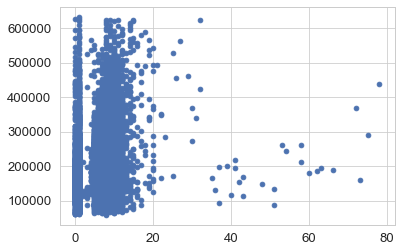

In [34]:
plt.scatter(df['KitchenSquare'], df['Price'])

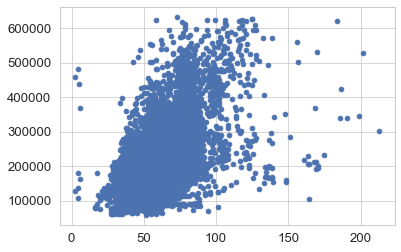

In [35]:
plt.scatter(df['Square'], df['Price'])

In [36]:
df['Square'].describe()

count   10,000.00
mean        56.25
std         19.04
min          2.38
25%         41.87
50%         52.63
75%         65.98
max        212.93
Name: Square, dtype: float64

In [37]:
df[(df['Square']<10)][['Price', 'Square', 'Rooms']]

,Price,Square,Rooms
Id,,,
11526,"107,604.27",4.63,1.00
10202,"137,597.60",4.60,1.00
9487,"369,472.40",5.55,1.00
3224,"126,596.94",2.38,1.00
4504,"161,379.07",5.61,3.00
14786,"181,434.83",4.53,1.00
15744,"458,378.78",2.64,1.00
6782,"438,005.18",5.26,1.00
7657,"483,283.49",4.62,1.00


###### Вывод: квартиры площадью меньше 10 с учетом цены за них - это явный выброс, исправим это.

In [38]:
df.loc[df['Square']<10 , 'Square'] = df['Square'].median()

In [39]:
df_test.loc[df_test['Square']<10 , 'Square'] = df['Square'].median()

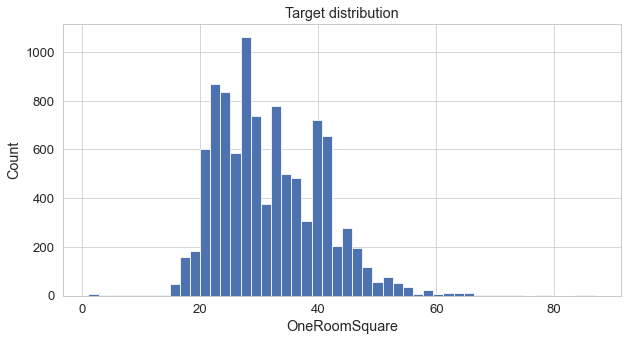

In [40]:
plt.figure(figsize = (10, 5))

df['OneRoomSquare'].hist(bins=50)
plt.ylabel('Count')
plt.xlabel('OneRoomSquare')
plt.title('Target distribution');

###### Теперь - норм

## Обработаем остальные "подозрительные" переменные

In [41]:
df['Healthcare_1'].fillna(df['Healthcare_1'].median(), inplace=True)
df_test['Healthcare_1'].fillna(df['Healthcare_1'].median(), inplace=True)

In [42]:
df.loc[df['HouseFloor'] < df['Floor'], 'HouseFloor'] = df['Floor']
df_test.loc[df_test['HouseFloor'] < df_test['Floor'], 'HouseFloor'] = df_test['Floor']

In [43]:
df.loc[(df['HouseYear']<1800) | (df['HouseYear']> 2020), 'HouseYear']

Id
10814    20052011
11607        4968
Name: HouseYear, dtype: int64

In [44]:
df_test.loc[(df_test['HouseYear']<1800) | (df_test['HouseYear']> 2020), 'HouseYear']

Series([], Name: HouseYear, dtype: int64)

In [45]:
df.loc[df['HouseYear'] > 2020, 'HouseYear'] = 2020

## Введем новые переменные, характерные для недвижимости

## Популярность района

In [46]:
df['DistrictId'].value_counts()

27     851
1      652
23     565
6      511
9      294
      ... 
199      1
205      1
174      1
209      1
207      1
Name: DistrictId, Length: 205, dtype: int64

In [47]:
df_test['DistrictId'].value_counts()

27     391
1      344
23     264
6      257
9      132
      ... 
212      1
208      1
204      1
200      1
193      1
Name: DistrictId, Length: 201, dtype: int64

In [48]:
district_size = df['DistrictId'].value_counts().reset_index().rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})

In [49]:
district_size.describe()

,DistrictId,DistrictSize
count,205.00,205.00
mean,102.13,48.78
std,59.55,97.40
min,0.00,1.00
25%,51.00,7.00
50%,102.00,18.00
75%,153.00,56.00
max,209.00,851.00


###### отсекаем "хвост" по правилу Парето

In [50]:
districts_popular = district_size.loc[district_size['DistrictSize'] > 60, 'DistrictId'].tolist()

In [51]:
district_size.loc[~district_size['DistrictId'].isin(districts_popular), 'DistrictId'] = 999
district_size = district_size.groupby('DistrictId')['DistrictSize'].agg(
                            DistrictSize='median')
district_size.reset_index(level='DistrictId', inplace=True)


In [52]:
df.loc[~df['DistrictId'].isin(districts_popular), 'DistrictId'] = 999
df_test.loc[~df_test['DistrictId'].isin(districts_popular), 'DistrictId'] = 999

In [53]:
df['DistrictId'].value_counts().head(20)

999    2745
27      851
1       652
23      565
6       511
9       294
62      247
30      228
58      179
53      174
21      165
52      143
8       142
11      129
46      119
61      118
45      116
74      114
34      111
57      107
Name: DistrictId, dtype: int64

In [54]:
df_test['DistrictId'].value_counts().head(20)

999    1439
27      391
1       344
23      264
6       257
9       132
62      122
30      115
53       91
58       91
21       70
52       67
61       64
8        64
46       61
34       61
74       61
29       60
3        56
57       54
Name: DistrictId, dtype: int64

In [55]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 725 to 12504
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     5000 non-null   int64  
 1   Rooms          5000 non-null   float64
 2   Square         5000 non-null   float64
 3   LifeSquare     5000 non-null   float64
 4   KitchenSquare  5000 non-null   float64
 5   Floor          5000 non-null   int64  
 6   HouseFloor     5000 non-null   float64
 7   HouseYear      5000 non-null   int64  
 8   Ecology_1      5000 non-null   float64
 9   Ecology_2      5000 non-null   object 
 10  Ecology_3      5000 non-null   object 
 11  Social_1       5000 non-null   int64  
 12  Social_2       5000 non-null   int64  
 13  Social_3       5000 non-null   int64  
 14  Healthcare_1   5000 non-null   float64
 15  Helthcare_2    5000 non-null   int64  
 16  Shops_1        5000 non-null   int64  
 17  Shops_2        5000 non-null   object 
 18  OneRo

### добавляем признак в датафрейм

In [56]:
df = df.merge(district_size, on='DistrictId', how='left').set_index(df.index)
df_test = df_test.merge(district_size, on='DistrictId', how='left').set_index(df_test.index)

In [57]:
df['PriceOneSquare'] = df['Price'] / df['Square']

In [58]:
df['PriceOneSquare'].describe()

count   10,000.00
mean     3,887.71
std      1,252.60
min        638.98
25%      2,910.41
50%      3,905.43
75%      4,689.95
max     11,854.65
Name: PriceOneSquare, dtype: float64

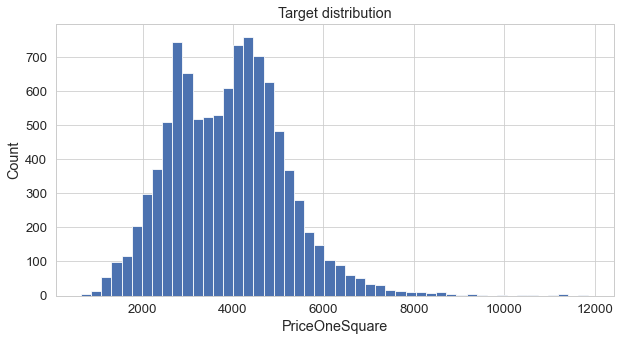

In [59]:
plt.figure(figsize = (10, 5))

df['PriceOneSquare'].hist(bins=50)
plt.ylabel('Count')
plt.xlabel('PriceOneSquare')
plt.title('Target distribution');

In [60]:
price_by_district = df.groupby(['DistrictId'], as_index=False)\
                        .agg({'PriceOneSquare':'median'})\
                        .rename(columns={'PriceOneSquare':'PriceOneSquareByDistrict'})

price_by_district.head(20)

,DistrictId,PriceOneSquareByDistrict
0,1,"3,248.40"
1,2,"4,550.71"
2,3,"3,892.20"
3,6,"2,847.18"
4,7,"4,562.03"
5,8,"4,122.35"
6,9,"3,206.59"
7,11,"4,134.35"
8,12,"4,133.48"
9,13,"4,273.75"


In [61]:
df = df.merge(price_by_district, on=['DistrictId'], how='left').set_index(df.index)
df_test = df_test.merge(price_by_district, on=['DistrictId'], how='left').set_index(df_test.index)

In [62]:
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,OneRoomSquare,DistrictSize,PriceOneSquare,PriceOneSquareByDistrict
Id,,,,,,,,,,,,,,,,,,,,,
14038,999,2.00,47.98,29.44,6.00,7,9.00,1969,0.09,B,...,5,900.00,0,11,B,"184,966.93",23.00,11,"3,854.96","4,722.33"
15053,41,3.00,65.68,40.05,8.00,7,9.00,1978,0.00,B,...,1,240.00,1,16,B,"300,009.45",21.00,87,"4,567.49","4,437.30"
4765,53,2.00,44.95,29.20,0.00,8,12.00,1968,0.05,B,...,0,229.00,1,3,B,"220,925.91",22.00,174,"4,915.15","4,830.23"
5809,58,2.00,53.35,52.73,9.00,8,17.00,1977,0.44,B,...,3,"1,084.00",0,5,B,"175,616.23",26.00,179,"3,291.59","2,949.98"
10783,99,1.00,39.65,23.78,7.00,11,12.00,1976,0.01,B,...,1,"2,078.00",2,4,B,"150,226.53",39.00,97,"3,788.89","3,992.03"


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DistrictId                10000 non-null  int64  
 1   Rooms                     10000 non-null  float64
 2   Square                    10000 non-null  float64
 3   LifeSquare                10000 non-null  float64
 4   KitchenSquare             10000 non-null  float64
 5   Floor                     10000 non-null  int64  
 6   HouseFloor                10000 non-null  float64
 7   HouseYear                 10000 non-null  int64  
 8   Ecology_1                 10000 non-null  float64
 9   Ecology_2                 10000 non-null  object 
 10  Ecology_3                 10000 non-null  object 
 11  Social_1                  10000 non-null  int64  
 12  Social_2                  10000 non-null  int64  
 13  Social_3                  10000 non-null  int64  
 14  Hea

In [64]:
df_test.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,OneRoomSquare,DistrictSize,PriceOneSquareByDistrict
Id,,,,,,,,,,,,,,,,,,,,,
725,58,2.00,49.88,33.43,6.00,6,14.00,1972,0.31,B,...,11,2748,1,900.00,0,0,B,24.00,179,"2,949.98"
15856,74,2.00,69.26,68.26,1.00,6,6.00,1977,0.08,B,...,6,1437,3,900.00,0,2,B,34.00,114,"3,284.69"
5480,999,1.00,15.95,13.60,12.00,2,5.00,1909,0.00,B,...,30,7538,87,"4,702.00",5,5,B,13.00,11,"4,722.33"
15664,47,2.00,73.05,51.94,9.00,22,22.00,2007,0.10,B,...,23,4583,3,900.00,3,3,B,36.00,97,"4,181.96"
14275,27,1.00,47.53,43.39,1.00,17,17.00,2017,0.07,B,...,2,629,1,900.00,0,0,A,47.00,851,"2,755.86"


In [65]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 725 to 12504
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DistrictId                5000 non-null   int64  
 1   Rooms                     5000 non-null   float64
 2   Square                    5000 non-null   float64
 3   LifeSquare                5000 non-null   float64
 4   KitchenSquare             5000 non-null   float64
 5   Floor                     5000 non-null   int64  
 6   HouseFloor                5000 non-null   float64
 7   HouseYear                 5000 non-null   int64  
 8   Ecology_1                 5000 non-null   float64
 9   Ecology_2                 5000 non-null   object 
 10  Ecology_3                 5000 non-null   object 
 11  Social_1                  5000 non-null   int64  
 12  Social_2                  5000 non-null   int64  
 13  Social_3                  5000 non-null   int64  
 14  Healt

## Отбор признаков

In [66]:
df.to_csv('First_prepared.csv')
df_test.to_csv('test_prepared.csv')

In [67]:
x_parametrs = [
# 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 #'Ecology_2',
 #'Ecology_3',
 'Social_1',
# 'Social_2',
 'Social_3',
 'Healthcare_1',
# 'Helthcare_2',
 'Shops_1',
# 'Shops_2',
# 'OneRoomSquare',
 'DistrictSize',
 'PriceOneSquareByDistrict'
]

X = df[x_parametrs]
X_test = df_test[x_parametrs]

In [68]:
y = df['Price']

### Построение модели Random Forest
Перекрестная проверка модели

In [69]:
forest = RandomForestRegressor(max_depth=18, 
                               max_features=5, 
                               n_estimators=400,
                               random_state=42)

In [70]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

cv_score = cross_val_score(forest, X, y, scoring='r2', cv=kf)
print('R2: {:.5f}'.format(cv_score.mean()))

R2: 0.75423


In [71]:
forest.fit(X, y)
importances = forest.feature_importances_
feat_importances = pd.Series(importances, index=x_parametrs)
feat_importances.sort_values(ascending=True, inplace=True)

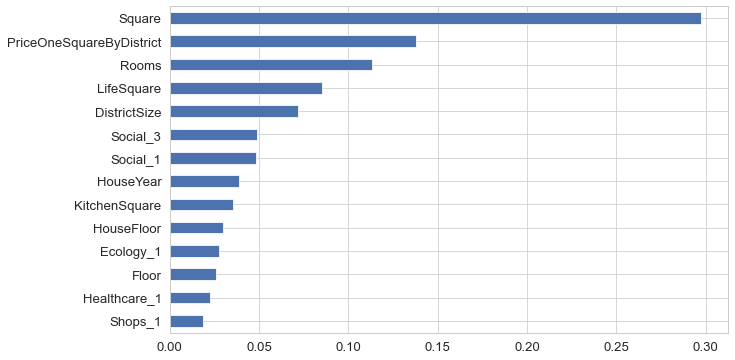

In [72]:
feat_importances.plot(kind='barh', figsize=(10, 6));

## Прогноз

In [73]:
y_predict = forest.predict(X_test)

In [74]:
preds = pd.DataFrame()
preds['Id'] = X_test.index
preds['Price'] = y_predict
preds.head(20)

,Id,Price
0,725,"158,630.13"
1,15856,"232,413.88"
2,5480,"220,477.47"
3,15664,"307,755.53"
4,14275,"143,851.16"
5,7633,"210,520.53"
6,13329,"167,540.45"
7,5502,"221,822.83"
8,4220,"294,259.21"
9,11538,"213,069.74"


In [75]:
preds.to_csv('AKharkovtsov_predictions.csv', index=False)